<a href="https://colab.research.google.com/github/raginikp/Machine_learning_Lab/blob/exp3/exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
df.shape

(1727, 7)

In [6]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
df.columns=col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
df.shape

(1727, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [12]:
X=df.drop(['class'],axis=1)
y=df['class']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [15]:
X_train.shape,X_test.shape

((1157, 6), (570, 6))

In [17]:
!pip install category_encoders
import category_encoders as ce

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [18]:
import category_encoders as ce

In [19]:
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)


In [20]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [22]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


In [23]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [27]:
y_pred_gini=clf_gini.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index:{0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))


Model accuracy score with criterion gini index:0.8053


In [30]:
y_pred_train_gini=clf_gini.predict(X_train)

In [31]:
y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [33]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train_gini)))

Training-set accuracy score: 0.7848


[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'gini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]')]

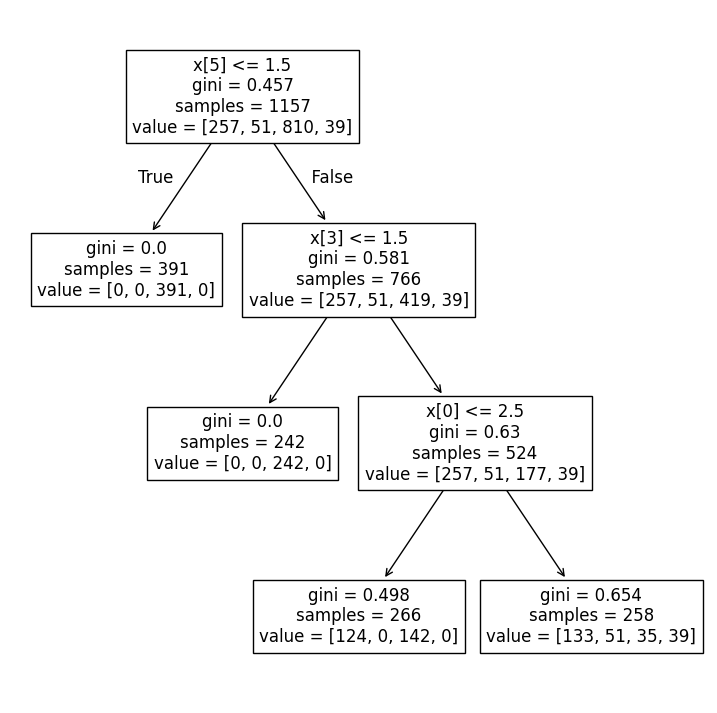

In [34]:
plt.figure(figsize=(9,9))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train,y_train))

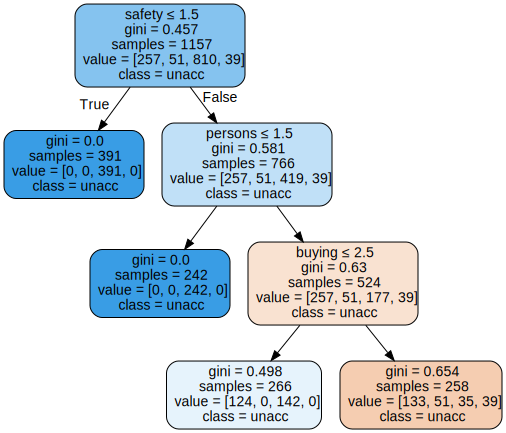

In [35]:
import graphviz
dot_data = tree.export_graphviz(clf_gini,out_file=None, feature_names=X_train.columns, class_names=y_train, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [36]:
clf_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [37]:
y_pred_entropy=clf_entropy.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy index: {0:0.4f}'.format(accuracy_score(y_test,y_pred_entropy)))

Model accuracy score with criterion entropy index: 0.8053


In [39]:
y_pred_train_entropy=clf_entropy.predict(X_train)
y_pred_train_entropy

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [41]:
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train,y_pred_train_entropy)))

Training-set accuracy score: 0.7848


[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 1.5\nentropy = 1.484\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\nentropy = 1.639\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'entropy = 0.997\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 1.758\nsamples = 258\nvalue = [133, 51, 35, 39]')]

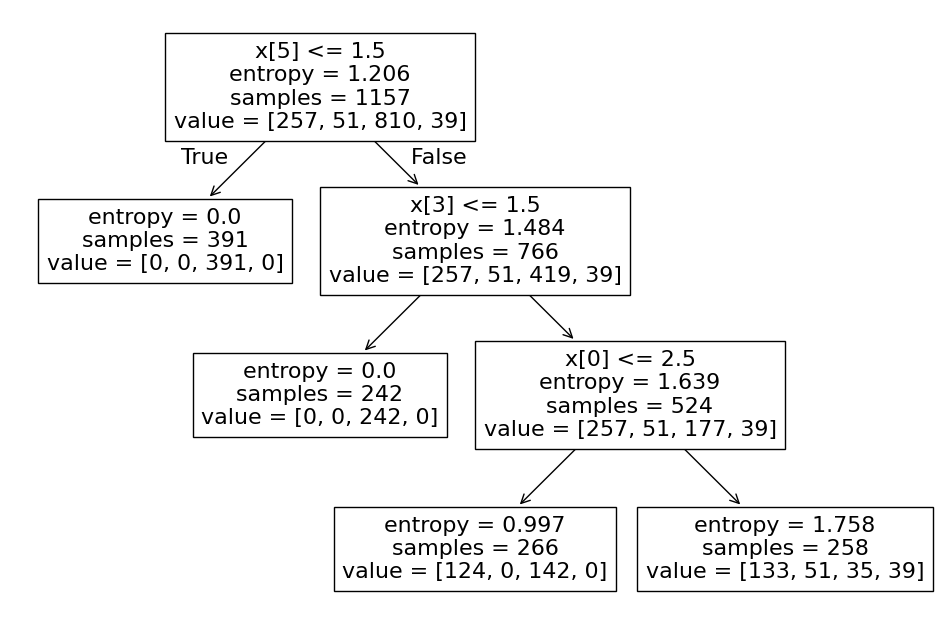

In [42]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_entropy.fit(X_train,y_train))

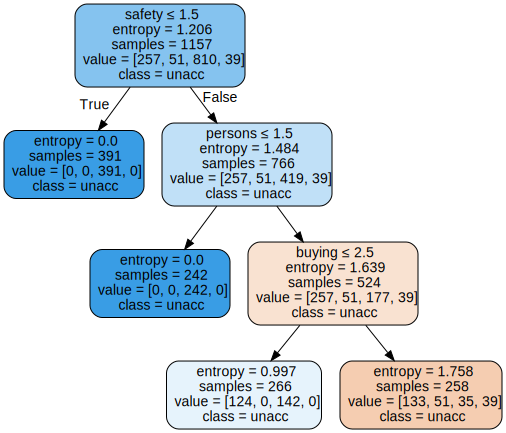

In [43]:
import graphviz
dot_data = tree.export_graphviz(clf_entropy,out_file=None,feature_names=X_train.columns,class_names=y_train,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph